In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
titanic = sns.load_dataset("titanic")

- 문제 1. Titanic

In [2]:
# 1. embark_town, sex 별 생존율
dt = titanic.pivot_table('survived', 'embark_town', 'sex') * 100
dt

sex,female,male
embark_town,,
Cherbourg,87.671233,30.526316
Queenstown,75.000000,7.317073
Southampton,68.965517,17.460317


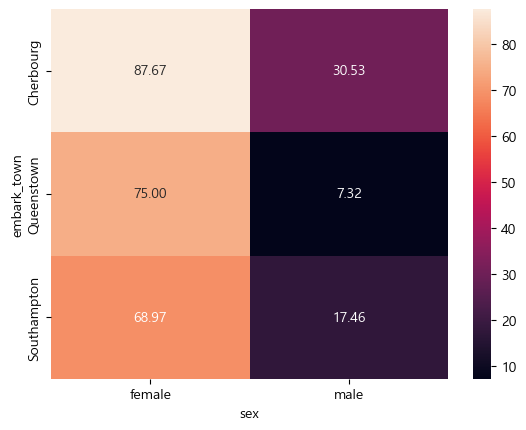

In [3]:
sns.heatmap(dt, annot=True, fmt='.2f');

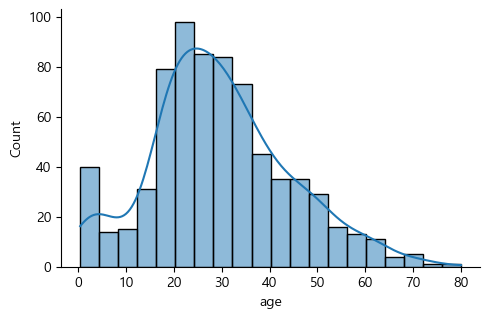

In [4]:
# 2. 나이 분포
fig = sns.displot(x='age', data=titanic, kde=True)
fig.fig.set_size_inches(5, 3);

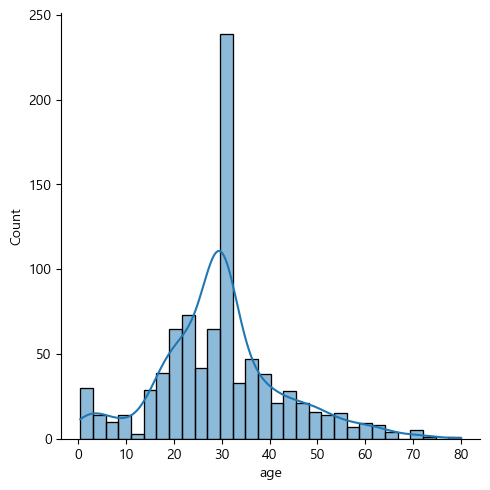

In [5]:
# 결측치를 평균으로 변경
titanic.age.fillna(titanic.age.mean(), inplace=True)
sns.displot(x='age', data=titanic, kde=True);

- 문제 2. CCTV

In [6]:
filename = '../02.Pandas/data/서울시 자치구 년도별 CCTV 설치 현황_221231기준.csv'
columns = '구분,총계'.split(',')
cctv = pd.read_csv(filename, encoding='euc=kr', thousands=',')
cctv = cctv[columns]
cctv.drop([0], inplace=True)
cctv.rename(columns={'구분':'자치구'}, inplace=True)
cctv.head(3)

,자치구,총계
1,종로구,1980
2,중 구,2584
3,용산구,2847


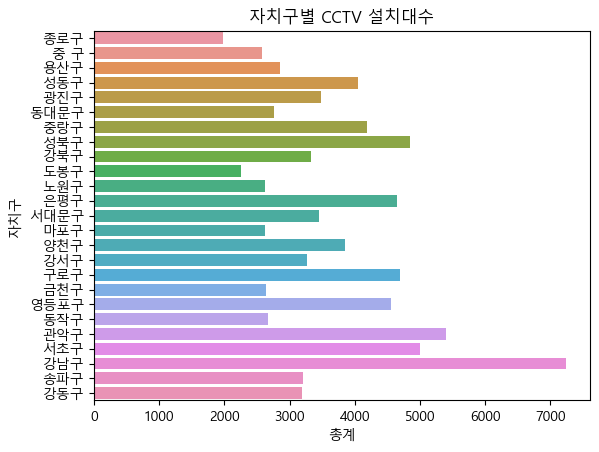

In [7]:
# 1. Unsorted
sns.barplot(x='총계', y='자치구', data=cctv)
plt.title('자치구별 CCTV 설치대수');

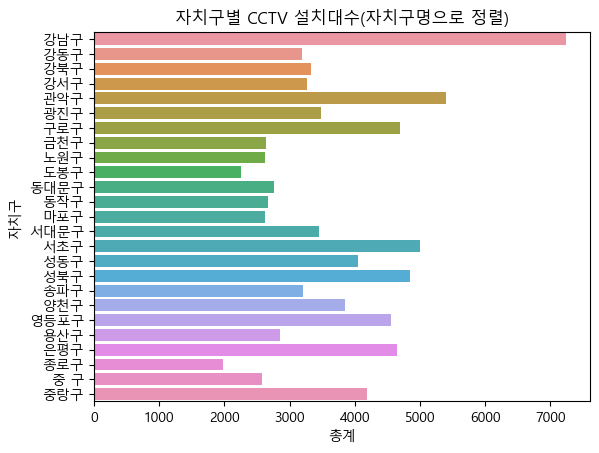

In [8]:
# 2. 자치구 이름으로 정렬
si = cctv.sort_values(by='자치구')
sns.barplot(x='총계', y='자치구', data=si)
plt.title('자치구별 CCTV 설치대수(자치구명으로 정렬)');

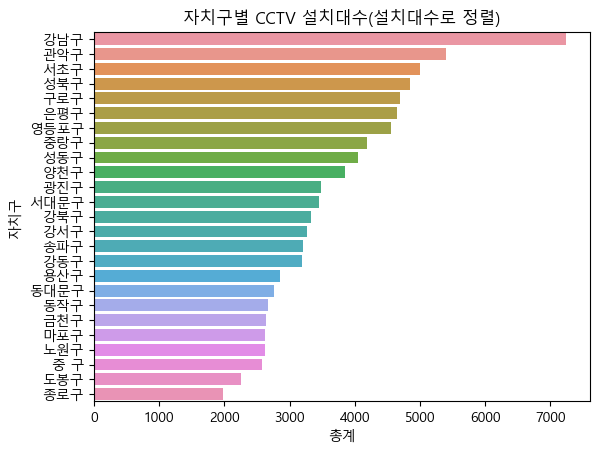

In [9]:
# 3. 설치대수로 정렬
sv = cctv.sort_values(by='총계', ascending=False)
sns.barplot(y='자치구', x='총계', data=sv)
plt.title('자치구별 CCTV 설치대수(설치대수로 정렬)');